In [1]:
import pandas as pd

# Web scraping - pridobivanje podatkov s spleta


## What Is Web Scraping?

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png" src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png">

### Why Web Scraping for Data Science?

## Network complexity

## HTTP

## HTTP in Python: The Requests Library

[Requests: HTTP for Humans](https://2.python-requests.org/en/master/)

V pythonu uporabljamo knjiznico requests.

In [3]:
import requests

In [4]:
url = 'http://example.com/'
r = requests.get(url)
r

<Response [200]>

In [5]:
type(r)

requests.models.Response

In [6]:
r.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #fff;\n        }\n        div {\n            width: auto;\n            margin: 0 auto;\n            border-radius: 0;\n            padding: 1em;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n

In [7]:
#pogledamo, če je bilo pridobivanje kode uspešno
#če je 200, je bilo OK
r.status_code

200

In [8]:
r.reason

'OK'

In [9]:
r.headers

{'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 22 May 2019 17:40:58 GMT', 'Etag': '"1541025663+gzip"', 'Expires': 'Wed, 29 May 2019 17:40:58 GMT', 'Last-Modified': 'Fri, 09 Aug 2013 23:54:35 GMT', 'Server': 'ECS (dcb/7ECB)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '606'}

In [10]:
r.request

<PreparedRequest [GET]>

In [12]:
#vidiš, da je bil zahtevek poslan iz pythona
r.request.headers

{'User-Agent': 'python-requests/2.21.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

## HTML and CSS

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png" src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png">

### Hypertext Markup Language: HTML

Link strani: https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687

In [5]:
url_got = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'

In [6]:
r = requests.get(url_got)

- `<p>...</p>` to enclose a paragraph;
- `<br>` to set a line break;
- `<table>...</table>` to start a table block, inside; `<tr>...<tr/>` is used for the rows; and `<td>...</td>` cells;
- `<img>` for images;
- `<h1>...</h1> to <h6>...</h6>` for headers;
- `<div>...</div>` to indicate a “division” in an HTML document, basically used to group a set of elements;
- `<a>...</a>` for hyperlinks;
- `<ul>...</ul>, <ol>...</ol>` for unordered and ordered lists respectively; inside of these, `<li>...</li>` is used for each list item.

## Using Your Browser as a Development Tool

## The Beautiful Soup Library

In [10]:
html_cont = r.text

> **[beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: Beautiful Soup tries to organize complexity: it helps to parse, structure and organize the oftentimes very messy web by fixing bad HTML and presenting us with an easy-to-work-with Python structure.

In [8]:
from bs4 import BeautifulSoup

In [11]:
html_soup = BeautifulSoup(html_cont, 'html.parser')

In Python, multiple parsers exist to do so:
- `html.parser`: a built-in Python parser that is decent (especially when using recent versions of Python 3) and requires no extra installation.
- `lxml`: which is very fast but requires an extra installation.
- `html5lib`: which aims to parse web page in exactly the same way as a web browser does, but is a bit slower.

- `find(name, attrs, recursive, string, **keywords)`
    - najde samo prvi element
- `find_all(name, attrs, recursive, string, limit, **keywords)`
    - najde vse elemente

In [12]:
html_soup.find('h1')

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [13]:
html_soup.find('', {'id': 'firstHeading'})

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [17]:
html_all_h2 = html_soup.find_all('h2')
len(html_all_h2)
html_all_h2

[<h2>Contents</h2>,
 <h2><span class="mw-headline" id="Series_overview">Series overview</span></h2>,
 <h2><span class="mw-headline" id="Episodes">Episodes</span></h2>,
 <h2><span class="mw-headline" id="Home_media_releases">Home media releases</span></h2>,
 <h2><span class="mw-headline" id="Ratings">Ratings</span></h2>,
 <h2><span class="mw-headline" id="References">References</span></h2>,
 <h2><span class="mw-headline" id="External_links">External links</span></h2>,
 <h2>Navigation menu</h2>]

In [18]:
for found in html_soup.find_all('h2'):
    print(found)
    
#find_all ima nekaj uporabnih atributov

<h2>Contents</h2>
<h2><span class="mw-headline" id="Series_overview">Series overview</span></h2>
<h2><span class="mw-headline" id="Episodes">Episodes</span></h2>
<h2><span class="mw-headline" id="Home_media_releases">Home media releases</span></h2>
<h2><span class="mw-headline" id="Ratings">Ratings</span></h2>
<h2><span class="mw-headline" id="References">References</span></h2>
<h2><span class="mw-headline" id="External_links">External links</span></h2>
<h2>Navigation menu</h2>


In [19]:
first_h1 = html_soup.find('h1')
first_h1

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [21]:
#izpišem tag elementa
first_h1.name

'h1'

In [22]:
#vsebina znoraj h1
first_h1.contents

['List of ', <i>Game of Thrones</i>, ' episodes']

In [23]:
str(first_h1)

'<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>'

In [24]:
#če želimo dobiti točen tekst
first_h1.text

'List of Game of Thrones episodes'

In [26]:
first_h1.get_text()

'List of Game of Thrones episodes'

In [27]:
#slovar atributov znotraj h1
first_h1.attrs

{'id': 'firstHeading', 'class': ['firstHeading'], 'lang': 'en'}

In [29]:
first_h1.get_text('--')

'List of --Game of Thrones-- episodes'

In [30]:
first_h1.attrs['id']

'firstHeading'

In [31]:
#isto kot zgoraj
first_h1['id']

'firstHeading'

In [32]:
first_h1.get('id')

'firstHeading'

In [37]:
#html class - v pythonu je class rezerviran za razrede. zato uporabimo class_
cites = html_soup.find_all('cite', class_='citation', limit=4)
cites[0].get_text()

'Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016.'

In [41]:
link = cites[0].find('a')
link.get('href')

'http://tv.ign.com/articles/116/1160215p1.html'

In [43]:
for citation in cites:
    print('--->', citation.get_text(), '\n')

---> Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016. 

---> Fleming, Michael (January 16, 2007). "HBO turns Fire into fantasy series". Variety. Archived from the original on May 16, 2012. Retrieved September 3, 2016. 

---> "Game of Thrones". Emmys.com. Retrieved September 17, 2016. 

---> Roberts, Josh (April 1, 2012). "Where HBO's hit 'Game of Thrones' was filmed". USA Today. Archived from the original on April 1, 2012. Retrieved March 8, 2013. 



In [45]:
#PRIMER: preberemo celo tabelo in jo shranimo v dataframe
html_soup.text[:100]

'\n\n\n\nList of Game of Thrones episodes - Wikipedia\ndocument.documentElement.className=document.documen'

In [50]:
episodes = []
ep_tables = html_soup.find_all('table', class_='wikiepisodetable')

In [59]:
for table in ep_tables[0]:
    headers = []
    rows = table.find_all('tr')
    for header in table.find('tr').find_all('th'):
        #dobimo vse naslove:
        headers.append(header.text)
    for row in rows[1:]:
        values = []
        for col in row.find_all(['th', 'td']):
            values.append(col.text)
        if values:
            episode_dict = {headers[i]:values[i] for i in range (len(values))}
            episodes.append(episode_dict)

In [60]:
episodes[0]

{'No.overall': '1',
 'No. inseason': '1',
 'Title': '"Winter Is Coming"',
 'Directed by': 'Tim Van Patten',
 'Written by': 'David Benioff & D. B. Weiss',
 'Original air date': 'April\xa017,\xa02011\xa0(2011-04-17)',
 'U.S. viewers(millions)': '2.22[20]'}

In [61]:
pd.DataFrame(episodes).head(5)

,Directed by,No. inseason,No.overall,Original air date,Title,U.S. viewers(millions),Written by
0,Tim Van Patten,1,1,"April 17, 2011 (2011-04-17)","""Winter Is Coming""",2.22[20],David Benioff & D. B. Weiss
1,Tim Van Patten,2,2,"April 24, 2011 (2011-04-24)","""The Kingsroad""",2.20[21],David Benioff & D. B. Weiss
2,Brian Kirk,3,3,"May 1, 2011 (2011-05-01)","""Lord Snow""",2.44[22],David Benioff & D. B. Weiss
3,Brian Kirk,4,4,"May 8, 2011 (2011-05-08)","""Cripples, Bastards, and Broken Things""",2.45[23],Bryan Cogman
4,Brian Kirk,5,5,"May 15, 2011 (2011-05-15)","""The Wolf and the Lion""",2.58[24],David Benioff & D. B. Weiss


# Web APIs

### Primer uporabe APIja

https://github.com/HackerNews/API

In [72]:
articles = []

In [63]:
#za zadnjo poševnico v urlju so še razle nastnosti api-ja
url = 'https://hacker-news.firebaseio.com/v0'

In [66]:
top_stories = requests.get(url + '/topstories.json')
top_stories.text

'[20019647,20019874,20019206,20019877,20021568,20019975,20014281,20022186,20020282,20021289,20022086,20019355,20020644,20021615,20014303,20020837,20014330,20015581,20021521,20014694,20014230,20014372,20012499,20017854,20019258,20015968,20020095,20014426,20018535,20012953,20015109,20017506,20021159,20013533,20008694,20017646,20011937,20012231,20016964,20016177,20014030,20017593,20016848,20014002,20016982,20015775,20017373,20016138,20014691,20009825,20016264,20015633,20010510,20012687,20014388,20010881,20011521,20018934,20016340,20016728,20008908,20008943,20017104,20013716,20016181,20014184,20017448,20016997,20013616,20015944,20019487,20017493,20014233,20016986,20008466,20016700,20020542,20007077,20015760,20017595,20016126,20003892,20013598,20007638,20013662,20013732,20009017,19998806,20021999,20010812,20013588,20017061,19997813,20015638,20013720,20020210,20007752,20013751,20009037,20014204,20008230,20015406,20017449,20001151,20012977,20011768,20013486,20015724,20016972,20018661,20006162

In [68]:
top_stories = top_stories.json()

In [73]:
for story_id in top_stories[:5]:
    story_url = url + f'/item/{story_id}.json'
    print('Prenos: ', story_url)
    r = requests.get(story_url)
    story_dict = r.json()
    articles.append(story_dict)

Prenos:  https://hacker-news.firebaseio.com/v0/item/20019647.json
Prenos:  https://hacker-news.firebaseio.com/v0/item/20019874.json
Prenos:  https://hacker-news.firebaseio.com/v0/item/20019206.json
Prenos:  https://hacker-news.firebaseio.com/v0/item/20019877.json
Prenos:  https://hacker-news.firebaseio.com/v0/item/20021568.json


In [74]:
articles[0]

{'by': 'ChuckMcM',
 'descendants': 107,
 'id': 20019647,
 'kids': [20019656,
  20021798,
  20019813,
  20021427,
  20020785,
  20020158,
  20020261,
  20020167,
  20019727,
  20021141,
  20019699],
 'score': 227,
 'time': 1558934592,
 'title': 'Arm announces its new premium CPU and GPU designs',
 'type': 'story',
 'url': 'https://techcrunch.com/2019/05/26/arm-announces-its-new-premium-cpu-and-gpu-designs/'}

### Import data from web - pandas

##### [Odprti podatki Slovenije](https://podatki.gov.si/)


Na portalu OPSI boste našli vse od podatkov, orodij, do koristnih virov, s katerimi boste lahko razvijali spletne in mobilne aplikacije, oblikovali lastne infografike in drugo

Primer: https://support.spatialkey.com/spatialkey-sample-csv-data/

In [76]:
data = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Web Scraping using pandas

> Spletna stran: https://www.fdic.gov/bank/individual/failed/banklist.html

`pandas.read_html: ` Read HTML tables into a list of DataFrame objects. -> [Dokumentacija](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html)



In [77]:
tables = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')
len(tables)

1

In [78]:
banks = tables[0]
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [79]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","January 29, 2019"


In [80]:
#pogledamo koliko bank se je zaprlo po letih
close_timestamps = pd.to_datetime(banks['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64

## Primeri

### Scraping and Visualizing IMDB Ratings

Stran: http://www.imdb.com/title/tt0944947/episodes

In [81]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'

In [ ]:
#za vse sezone game of thrones želimo dobiti graf ocen epizod

In [82]:
episodes = []
rankings = []

In [84]:
for season in range(1,9):
    r = requests.get(url, params={'seasons': season})
    if r.status_code == 200: #preverimo, da je bil request res narejen
        soup = BeautifulSoup(r.text, 'html.parser')
        listing = soup.find('div', class_='eplist')
        #rekurzivnost spodaj nastavimo na False, da dobimo samo 1. element
        for epnr, div in enumerate(listing.find_all('div',recursive=False)):
            episode = r'{season}.{epnr + 1}'
            rating_el = div.find(class_='ipl-rating-star__rating')
            print(episode, rating_el)
            print('----------------')
            rating = float(rating_el.get_text(strip=True))
            episodes.append(episode)
            rankings.append(rating)


{season}.{epnr + 1} <span class="ipl-rating-star__rating">7.7</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">8.0</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">7.6</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">5.6</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">6.2</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">4.3</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">7.7</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">8.0</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">7.6</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">5.6</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rating">6.2</span>
----------------
{season}.{epnr + 1} <span class="ipl-rating-star__rati

In [85]:
rankings[:20]

[7.7,
 8.0,
 7.6,
 5.6,
 6.2,
 4.3,
 7.7,
 8.0,
 7.6,
 5.6,
 6.2,
 4.3,
 7.7,
 8.0,
 7.6,
 5.6,
 6.2,
 4.3,
 7.7,
 8.0]

In [86]:
episodes[:20]

['{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}',
 '{season}.{epnr + 1}']

<BarContainer object of 48 artists>

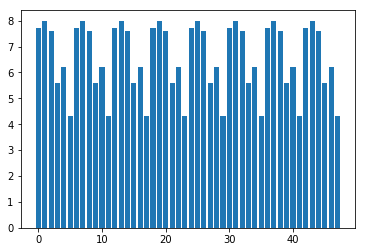

In [89]:
import matplotlib.pylab as plt
plt.figure()
positions = [a for a in range(len(rankings))]
plt.bar(positions, rankings, align='center')


In [90]:
#tole zgoraj ne dela čisto ok

### Scraping Fast Track data

Stran: https://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/

In [97]:
# import libraries
from bs4 import BeautifulSoup
import requests
import csv

In [98]:
# specify the url
urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

In [99]:
page = requests.get(urlpage)

In [100]:
soup = BeautifulSoup(page.text, 'html.parser')

In [101]:
table = soup.find('table', class_='tableSorter')

In [103]:
results = table.find_all('tr')
b

No. of rows:  101


In [104]:
results[0]

<tr>
<th>Rank</th>
<th>Company</th>
<th class="">Location</th>
<th class="no-word-wrap">Year end</th>
<th class="" style="text-align:right;">Annual sales rise over 3 years</th>
<th class="" style="text-align:right;">Latest sales £000s</th>
<th class="" style="text-align:right;">Staff</th>
<th class="">Comment</th>
<!--				<th>FYE</th>-->
</tr>

In [105]:
rows = []
for row in results[0].find_all('th'):
    rows.append(row.contents[0])
#dobimo imena stolpcev:   
rows

['Rank',
 'Company',
 'Location',
 'Year end',
 'Annual sales rise over 3 years',
 'Latest sales £000s',
 'Staff',
 'Comment']

In [106]:
rows = []
rows.append(['Rank', 'Company Name', 'Webpage', 'Description', 'Location',
            'Year End', 'Annual sales rise over 3 years', 'Sales £000s',
            'Staff', 'Comments'])
rows

[['Rank',
  'Company Name',
  'Webpage',
  'Description',
  'Location',
  'Year End',
  'Annual sales rise over 3 years',
  'Sales £000s',
  'Staff',
  'Comments']]

In [108]:
for result in results:
    data = result.find_all('td')
    if len(data) == 0:
        continue
data

[<td>100</td>,
 <td><a href="https://www.fasttrack.co.uk/company_profile/brompton-technology/"><span class="company-name">Brompton Technology</span></a>Video technology provider</td>,
 <td>West London</td>,
 <td>Aug-17</td>,
 <td style="text-align:right;">50.17%</td>,
 <td style="text-align:right;">*5,250</td>,
 <td style="text-align:right;">27</td>,
 <td>Its technology is used in high-profile events such as the Oscars</td>]

In [109]:
# write columns to variables
rank = data[0].getText()
company = data[1].getText()
location = data[2].getText()
yearend = data[3].getText()
salesrise = data[4].getText()
sales = data[5].getText()
staff = data[6].getText()
comments = data[7].getText()

In [113]:
#želimo razdeliti na 2 dela
company

'Brompton TechnologyVideo technology provider'

In [115]:
companyname = data[1].find('span', class_='company-name').getText()
companyname

'Brompton Technology'

In [116]:
#trik kako dobimo še drugi del
description = company.replace(companyname, '')
description

'Video technology provider'

In [117]:
sales

'*5,250'

In [118]:
sales.strip('*')

'5,250'

In [119]:
sales.strip('*').replace(',','')

'5250'

In [120]:
data[1]

<td><a href="https://www.fasttrack.co.uk/company_profile/brompton-technology/"><span class="company-name">Brompton Technology</span></a>Video technology provider</td>

In [121]:
url = data[1].find('a').get('href')
url

'https://www.fasttrack.co.uk/company_profile/brompton-technology/'

In [123]:
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [125]:
try:
    tableRow = soup.find('table').find_all('tr')[-1]
    webpage = tableRow.find('a').get('href')
except:
    webpage = None
webpage

'http://www.bromptontech.com'

#### Celotni program skupaj

In [126]:
from bs4 import BeautifulSoup
import requests
import csv

urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

page = requests.get(urlpage)
soup = BeautifulSoup(page.text, 'html.parser')

table = soup.find('table', class_='tableSorter')
results = table.find_all('tr')
print('No. of rows: ', len(results))

No. of rows:  101


In [127]:
rows = []
rows.append(['Rank', 'Company Name', 'Webpage', 'Description', 'Location',
            'Year End', 'Annual sales rise over 3 years', 'Sales £000s',
            'Staff', 'Comments'])

In [129]:
for num, result in enumerate(results):
    data = result.find_all('td')
    if len(data) == 0:
        continue
    rank = data[0].getText()
    company = data[1].getText()
    location = data[2].getText()
    yearend = data[3].getText()
    salesrise = data[4].getText()
    sales = data[5].getText()
    staff = data[6].getText()
    comments = data[7].getText()
    
    companyname = data[1].find('span', class_='company-name').getText()
    description = company.replace(companyname, '')
    print(num, ' - Company is', companyname)
    
    sales = sales.strip('*').replace(',','')
    
    url = data[1].find('a').get('href')
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    try:
        tableRow = soup.find('table').find_all('tr')[-1]
        webpage = tableRow.find('a').get('href')
    except:
        webpage = None
    
    rows.append([rank, companyname, webpage, description, location, yearend,
                salesrise, sales, staff, comments])

1  - Company is Plan.com
2  - Company is PsiOxus
3  - Company is CensorNet
4  - Company is thoughtonomy
5  - Company is Perkbox
6  - Company is Ogury
7  - Company is Verve
8  - Company is goHenry
9  - Company is Darktrace
10  - Company is Bizuma
11  - Company is Depop
12  - Company is Laser Wire Solutions
13  - Company is Bought By Many
14  - Company is Optal
15  - Company is Infinox
16  - Company is Oakbrook
17  - Company is Carwow
18  - Company is Receipt Bank
19  - Company is dB Broadcast
20  - Company is The Car Buying Group
21  - Company is Festicket
22  - Company is Planixs
23  - Company is Gigaclear
24  - Company is TransferWise
25  - Company is PatSnap
26  - Company is Hyperoptic
27  - Company is GoCardless
28  - Company is Purple
29  - Company is Trustpay Global
30  - Company is iwoca
31  - Company is LADBible Group
32  - Company is Threads Styling
33  - Company is Prodigy Finance
34  - Company is Azimo
35  - Company is Chameleon
36  - Company is SuperAwesome
37  - Company is 

In [130]:
with open('OUT_companies.csv', 'w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

In [131]:
df = pd.read_csv('OUT_companies.csv')
df.head()

,Rank,Company Name,Webpage,Description,Location,Year End,Annual sales rise over 3 years,Sales £000s,Staff,Comments
0,1,Plan.com,http://www.plan.com,Communications provider,Isle of Man,Sep-17,364.38%,35418,90,About 650 partners use its telecoms platform t...
1,2,PsiOxus,http://www.psioxus.com,Biotechnology developer,Oxfordshire,Dec-17,311.67%,53136,54,Received a $15m milestone payment from its dev...
2,3,CensorNet,http://www.censornet.com,Cloud security software developer,Basingstoke,Dec-17,210.17%,7535,77,"Has more than 4,000 customers, including McDon..."
3,4,thoughtonomy,http://www.thoughtonomy.com,Automation software developer,East London,May-18,205.20%,16916,100,It sells to 28 countries and 50% of revenue is...
4,5,Perkbox,http://www.perkbox.com,Employee engagement services,Central London,Dec-17,204.12%,34700,200,Acquired software platform Loyalty Bay for an ...
